In [36]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [37]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

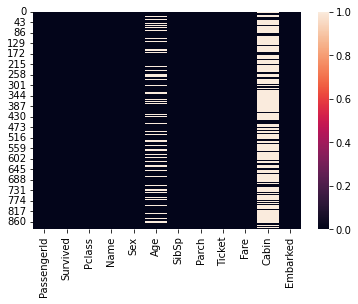

In [39]:
sns.heatmap(data.isnull())

<AxesSubplot:>

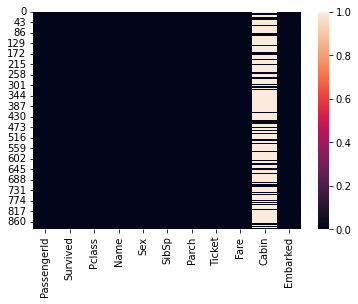

In [40]:
data = data.drop(['Age'],axis='columns')
sns.heatmap(data.isnull())

In [41]:
data = data.drop(['PassengerId','Name','Cabin','Ticket','Fare'],axis='columns')

In [42]:
y = data['Survived']
data = data.drop('Survived',axis='columns')
X = data

In [43]:
X = pd.get_dummies(data,columns=['Sex','Embarked'])
print(X)

     Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3      1      0           0         1           0           0   
1         1      1      0           1         0           1           0   
2         3      0      0           1         0           0           0   
3         1      1      0           1         0           0           0   
4         3      0      0           0         1           0           0   
..      ...    ...    ...         ...       ...         ...         ...   
886       2      0      0           0         1           0           0   
887       1      0      0           1         0           0           0   
888       3      1      2           1         0           0           0   
889       1      0      0           0         1           1           0   
890       3      0      0           0         1           0           1   

     Embarked_S  
0             1  
1             0  
2             1  
3             1  
4        

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X,y)
pred = dtc.predict(X)

print("Accuracy score : ",accuracy_score(pred,y,normalize=True))
print("Confusion matrix : \n",confusion_matrix(pred,y))

Accuracy score :  0.8372615039281706
Confusion matrix : 
 [[519 115]
 [ 30 227]]


In [45]:
test = pd.read_csv('test.csv')
passengerID = test['PassengerId']
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [46]:
test = test.drop(['Name','PassengerId','Ticket','Age','Cabin',],axis='columns')
test = test.drop(['Fare'],axis='columns')
X_test = pd.get_dummies(test,columns=['Sex','Embarked'])
print(X_test)

     Pclass  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3      0      0           0         1           0           1   
1         3      1      0           1         0           0           0   
2         2      0      0           0         1           0           1   
3         3      0      0           0         1           0           0   
4         3      1      1           1         0           0           0   
..      ...    ...    ...         ...       ...         ...         ...   
413       3      0      0           0         1           0           0   
414       1      0      0           1         0           1           0   
415       3      0      0           0         1           0           0   
416       3      0      0           0         1           0           0   
417       3      1      1           0         1           1           0   

     Embarked_S  
0             0  
1             1  
2             0  
3             1  
4        

In [47]:
final_pred = dtc.predict(X_test)
print(final_pred)

[0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [48]:
passengerID.shape

(418,)

In [49]:
s1 = pd.Series(passengerID)
s2 = pd.Series(final_pred)

final_df = pd.concat([s1,s2],axis='columns',names=['PassengerId','Survived'])
final_df.to_csv('final_output.csv',index=False)

In [53]:
## Gaussian NB
gauss = GaussianNB()
gauss.fit(X,y)
pred_gauss = gauss.predict(X)
print('Accuracy Score : ',accuracy_score(y,pred_gauss,normalize=True))

Accuracy Score :  0.7912457912457912


In [54]:
## Bernoulli NB
bern = BernoulliNB()
bern.fit(X,y)
pred_bern = bern.predict(X)
print('Accuracy Score : ',accuracy_score(y,pred_bern,normalize=True))

Accuracy Score :  0.7867564534231201


In [57]:
## KNN - Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X,y)
pred_knn = knn.predict(X)
print('Accuracy Score : ',accuracy_score(y,pred_knn,normalize=True))

Accuracy Score :  0.8159371492704826


In [70]:
## SVC
from sklearn.svm import SVC
svc = SVC(kernel='rbf',decision_function_shape='ovo',max_iter=5000)
svc.fit(X,y)
pred_svc = svc.predict(X)
print('Accuracy Score : ',accuracy_score(y,pred_svc,normalize=True))

print(pred_svc.shape)

Accuracy Score :  0.8103254769921436
(891,)


In [71]:
pred_svc = svc.predict(X_test)
print(pred_svc.shape)
s1 = pd.Series(passengerID).astype('int')
s2 = pd.Series(pred_svc)

final_df = pd.concat([s1,s2],axis='columns',names=['PassengerId','Survived'])
final_df.to_csv('final_output_svc.csv',index=False)

(418,)
